In [ ]:
import pandas as pd
import fasttext.util
import fasttext

# Fasttext - Facebook

In [ ]:
help(fasttext.FastText)

In [ ]:
#https://fasttext.cc/docs/en/supervised-tutorial.html
    
model = fasttext.train_supervised(input="cooking.train")

In [ ]:
#https://fasttext.cc/docs/en/crawl-vectors.html
    
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
url = 'https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz'
filename = '/cooking/cooking.tar'
#!wget url && 
#!tar xvzf cooking.stackexchange.tar.gz

import urllib.request
urllib.request.urlretrieve(url, filename)

!tar xvzf cooking.tar

In [ ]:
model = fasttext.load_model(r"D:\18-DS\Datasets-Large\wiki.hi\wiki.hi.bin")

#model = fasttext.train_unsupervised('data/fil9', "cbow")
#model = fasttext.train_unsupervised('data/fil9', minn=2, maxn=5, dim=300)
#model = fasttext.train_unsupervised('data/fil9', thread=4)

In [ ]:
model = fasttext.train_unsupervised('cooking/cooking.stackexchange.txt', model='skipgram')
#model = fasttext.train_unsupervised('data.txt', model='cbow')

In [ ]:
[model.get_word_vector(x) for x in ["हरी", "pidgey", "yellow"]]

In [ ]:
print(model['king'])

In [ ]:
model.get_word_vector("enviroment")
model.get_word_vector("नरेन्द्र")
model.get_nearest_neighbors('asparagus')
model.get_analogies("berlin", "germany", "france")


model_without_subwords = fasttext.train_unsupervised('data/fil9', maxn=0)
model_without_subwords.get_nearest_neighbors('accomodation')

In [ ]:
print(model.words)

In [ ]:
print(model.labels)

In [ ]:
model = fasttext.train_supervised('cooking/cooking.stackexchange.txt')


def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('cooking/cooking.stackexchange.txt'))

In [ ]:
model.predict("Which baking dish is best to bake a banana bread ?")

In [ ]:
model.predict("Which baking dish is best to bake a banana bread ?", k=3)

In [ ]:
model.predict(["Which baking dish is best to bake a banana bread ?", "Why not put knives in the dishwasher?"], k=3)

# NLTK

In [3]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv("Hinglish_Sarcasm.csv")
sentences = list(df.Sentence)
text_tokens = [sent.split() for sent in sentences]

In [5]:
text_tokens

[['#News', 'तीन', 'साल', 'बाथरूम', 'में', 'बंद', 'रही', 'विवाहिता'],
 ['#BJP',
  'की',
  'संवैधानिक',
  'तिकड़म-संविधान',
  'की',
  'धारा',
  'का',
  'गलत',
  'हवाला',
  'देकर',
  'सीक्रेट',
  'बैलट',
  '(जो',
  'होता',
  'ही',
  'नहीं)',
  'से',
  'दिल्ली',
  'में',
  'सरकार',
  'बनाने',
  'की',
  'अलोकतांत्रिक',
  'साजिश।'],
 ['हुर्रियत',
  'जेहादी',
  'यासिन',
  'मलिक',
  'और',
  'आजाद',
  'कश्मीर',
  'चिलाने',
  'वाले',
  'कश्मीर',
  'को',
  'बचाने',
  'आगे',
  'नहीं',
  'आएंगे',
  '#JammuKashmirFloods.',
  '#KashmirFloods'],
 ['J&K:',
  'भूस्खलन',
  'में',
  '7',
  'की',
  'मौत',
  '20',
  'लापता:',
  'जम्मू-कश्मीर',
  'के',
  'उधमपुर',
  'जिले',
  'के',
  'एक',
  'सुदूर',
  'पर्वतीय',
  'गांव',
  'में',
  'भारी',
  'बारिश',
  'के',
  'बा'],
 ['NCP',
  'के',
  'पूर्व',
  'नेता',
  'और',
  'मंत्री',
  'विजय',
  'कुमार',
  'गावित',
  'पर',
  'भ्रष्टाचार',
  'का',
  'आरोप',
  'लगा',
  'और',
  'कहा',
  'गया',
  'की',
  'गावित',
  'ने',
  'फर्जी',
  'लोगो',
  'के',
  'नाम'],
 ['हींग',


In [6]:
model = Word2Vec(text_tokens,min_count=1)

In [8]:
model.wv['विजय']

array([-3.1947424e-03,  1.2637663e-03,  1.1414490e-03,  1.0167346e-03,
       -3.2160468e-03,  1.6654595e-03, -2.9433190e-03, -6.9486992e-03,
        3.2800385e-03,  6.9001303e-03, -4.8899013e-03,  8.3384970e-03,
       -2.6407582e-03, -7.0006303e-03,  4.3827780e-03,  5.2663921e-03,
       -5.8943308e-03, -6.1862255e-03, -2.8082838e-03,  1.1207531e-03,
        9.9610933e-04, -3.9948565e-03,  2.7633149e-03,  6.6171321e-03,
       -1.7959710e-03,  5.5295671e-03, -2.3668821e-03,  7.5577605e-05,
        5.6774579e-03,  2.5183684e-03,  2.0886494e-03,  3.6558567e-03,
       -5.2414322e-03,  1.8852382e-03, -3.9763786e-03,  5.9568085e-04,
        7.7188034e-03,  7.2309282e-04,  3.4699186e-03,  5.3301910e-03,
        7.5613434e-04,  4.9680285e-03, -9.5546705e-04,  2.8121634e-03,
        1.1875530e-04, -6.4635987e-04,  2.3557660e-03, -4.0687300e-05,
        6.3179559e-03, -1.6262367e-03,  6.9505948e-04,  4.5903614e-03,
        2.2631614e-03,  3.6386726e-03, -4.0331939e-03,  1.6566974e-03,
      

In [9]:
model.wv.most_similar('विजय',topn=5)

[('कार्यकर्ता', 0.627685546875),
 ('छोड़कर', 0.6266782283782959),
 ('चोट', 0.6248048543930054),
 ('था,', 0.6240571737289429),
 ('लड़ी', 0.6214770674705505)]

In [15]:
import random
from sklearn.decomposition import PCA
random.seed(2)

In [12]:
X = model.wv[model.wv.vocab]

In [13]:
X

array([[ 6.0196524e-04,  4.2760456e-03, -9.1207642e-03, ...,
         7.5612089e-04,  1.3350611e-02, -1.7352980e-03],
       [-8.4604342e-03,  1.5758125e-02, -2.0744717e-02, ...,
        -7.9523716e-03,  3.1386167e-02, -5.9656654e-03],
       [-5.4161593e-02,  9.4372734e-02, -1.0751100e-01, ...,
        -4.5915309e-02,  1.2884010e-01, -4.5054067e-02],
       ...,
       [-1.8584220e-03,  5.5603650e-03, -5.2499450e-03, ...,
         2.0864862e-03,  8.4066745e-03,  2.1543785e-03],
       [-5.2824011e-03,  5.5721579e-03, -2.0054127e-03, ...,
         1.8081014e-03,  2.3879330e-03, -5.1123090e-05],
       [-2.0760153e-03,  8.1831519e-04, -7.3563977e-04, ...,
        -2.8423192e-03,  4.9065514e-03, -2.0591652e-03]], dtype=float32)

In [16]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [17]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]

In [19]:
words

['#पाकिस्तान',
 'करें।',
 'कामयाबी',
 "'आज",
 'चाहिए!',
 'italy,',
 '#HarHarMahadev',
 '#ModiTrumpMeet',
 'सीतारमण',
 '1951',
 'प्रतिबंधित!.',
 'जाते।',
 'कसम',
 'पर...',
 'ndtv',
 '😝😅😂😆😃😝😅😂',
 'Confidence',
 'ड्यूटी',
 'कुचल',
 'मांगता',
 'हाईकोर्ट',
 'देखो.अस्पताल',
 'मेहता',
 'मुबारक',
 '#CBIInvestigationForSushant',
 'जिहादीनी,',
 'लेने',
 'इमरान',
 'लोकल',
 'रणनीति.',
 "'व्हाट्सएप",
 'पोल',
 'रागा',
 '😁💪💪',
 '"बालक',
 'शाख़',
 'होंगे,',
 'मुआवजे',
 'डॉलर',
 'राहु',
 'राहत',
 'दिखाए',
 'रजवाड़े',
 'मंत्रीमंडल',
 '#राहुल',
 'आश्रम',
 'रचना?',
 'खुलासा:',
 '#धरना_भी',
 'क्या?',
 'नापता',
 'किये।',
 'उठाऊ',
 'नहाने',
 'धनी,',
 'जैसे-',
 'रखो.',
 'लूं.?',
 'स्वच्छ',
 'माहिर',
 'बख्शा',
 'How',
 'जयश्रीराम',
 'माह',
 'साइंटिस्ट',
 'Bandh:',
 'India',
 'पटेल,बाजपेई,शास्त्रीजी',
 'बना',
 'अपूर्णीय',
 'गए,बहुत',
 'हिंद',
 'आरोपियों',
 'धंधे',
 'ससुरा',
 'हे',
 'मानसिक',
 'पड',
 'क्या,',
 'चाहिए.?',
 'जैसा',
 '#MarkazCorona',
 'मुम्बई',
 'यानी',
 'चलवाईं.उधर',
 'लिंक',
 ':थोराट',
 'तन-मन',


In [23]:
import matplotlib.pyplot as plt

D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2381 missing from current

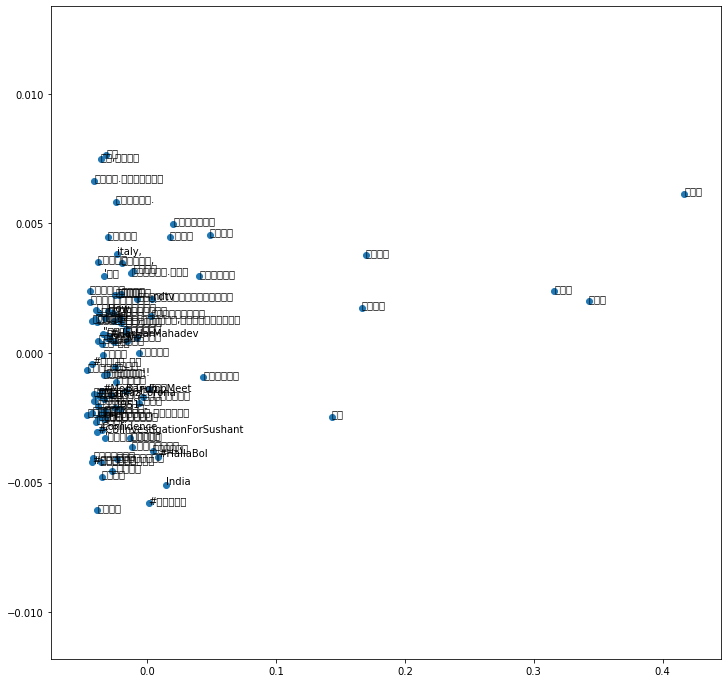

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

In [25]:
import nltk

from nltk.corpus import brown
#nltk.download()
#install 'brown' corpus

In [26]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Read the data from the Brown corpus
data = ' '.join(brown.words()[:10000])
data

"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `` to have t

In [29]:
TextCorpus = ['Seven continent planet',
'Five ocean planet', 
'Asia largest continent', 
'Pacific Ocean largest', 
'Ocean saline water']

text_tokens = [sent.split() for sent in TextCorpus]
print(text_tokens)

[['Seven', 'continent', 'planet'], ['Five', 'ocean', 'planet'], ['Asia', 'largest', 'continent'], ['Pacific', 'Ocean', 'largest'], ['Ocean', 'saline', 'water']]


In [30]:
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(TextCorpus) 

In [31]:
print(tfidf)

  (0, 8)	0.6591180018251055
  (0, 1)	0.5317722537280788
  (0, 6)	0.5317722537280788
  (1, 6)	0.5568161504458247
  (1, 2)	0.6901592662889633
  (1, 4)	0.46220770413113277
  (2, 1)	0.5317722537280788
  (2, 0)	0.6591180018251055
  (2, 3)	0.5317722537280788
  (3, 4)	0.46220770413113277
  (3, 3)	0.5568161504458247
  (3, 5)	0.6901592662889633
  (4, 4)	0.42799292268317357
  (4, 7)	0.6390704413963749
  (4, 9)	0.6390704413963749


In [32]:
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(sentences) 

In [33]:
print(tfidf)

  (0, 476)	0.669457249811482
  (0, 1287)	0.6858739926529694
  (0, 1679)	0.2853136114473362
  (1, 212)	0.33592081307590166
  (1, 968)	0.31263044425737435
  (1, 1063)	0.3605777920493781
  (1, 1901)	0.32830944301629134
  (1, 987)	0.14017584773887384
  (1, 1702)	0.43379329574441555
  (1, 1371)	0.1531404670096233
  (1, 1842)	0.25581361153849136
  (1, 1472)	0.2193496961112681
  (1, 706)	0.3215456350057318
  (1, 970)	0.3215456350057318
  (2, 1371)	0.1278158191582227
  (2, 1596)	0.2803700075754274
  (2, 1574)	0.2803700075754274
  (2, 952)	0.12798360527948463
  (2, 750)	0.1941536261961333
  (2, 1001)	0.5218622759462314
  (2, 1446)	0.22691711462307218
  (2, 745)	0.26576863049698596
  (2, 737)	0.2916957155265457
  (2, 381)	0.3826369251093989
  (2, 396)	0.3826369251093989
  :	:
  (1379, 1869)	0.5451996511810888
  (1379, 1324)	0.41568591139712546
  (1380, 987)	0.11833631991655601
  (1380, 1371)	0.12928103941258295
  (1380, 1406)	0.2585620788251659
  (1380, 1061)	0.23072637263585832
  (1380, 1562)	0

In [35]:
sentences[1381]

'दिल्ली वालों तुम्हें बिजली पानी मुफ़्त में देकर शराब, डीज़ल और पेट्रोल से पेल रहा हूँ फोन मत काटना मैं केजरीवाल बोल रहा हूँ ! #viasms'

In [36]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 3)
lsa = svd.fit_transform(tfidf)

In [37]:
lsa

array([[ 0.08779335, -0.04113968,  0.18628211],
       [ 0.17487715, -0.03315366, -0.08049556],
       [ 0.13555238,  0.08672726, -0.04690367],
       ...,
       [ 0.19714189, -0.16924302, -0.06730953],
       [ 0.26407956,  0.02348455,  0.00568857],
       [ 0.30215152, -0.18219476,  0.17302947]])

# BERT

In [38]:
!pip install transformers

  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893262 sha256=63fda56ed979db16b2aebe879f7a59ad407fd1593fb39563ba5442bb30feb2ba
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\69\09\d1\bf058f7d6fa0ecba2ce7c66be3b8d012beb4bf61a6e0c101c0
Successfully built sacremoses


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [41]:
df

,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [42]:
batch_1= df[:2000]

In [43]:
batch_1[1].value_counts()

1    1041
0     959
Name: 1, dtype: int64

### Pretrained-BERT

In [44]:
# for distillBERT
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# for BERT
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

#load pretrained , model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [45]:
# tokenization
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [46]:
#padding
max_len = 0
for i in tokenized.values:
    if len(i)>max_len:
        max_len = len(i)
        
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

In [47]:
np.array(padded).shape

(2000, 59)

In [48]:
# masking
attention_mask = np.where(padded != 0, 1,0)
attention_mask.shape

(2000, 59)

In [49]:
input_ids = torch.tensor(padded)

attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

RuntimeError: Expected tensor for argument #1 'indices' to have scalar type Long; but got torch.IntTensor instead (while checking arguments for embedding)

In [50]:
# train test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

NameError: name 'features' is not defined

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

In [ ]:
lr_clf.score(test_features, test_labels)

In [ ]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# LaBSE
Language-agnostic BERT sentence embedding model supporting 109 languages.
https://tfhub.dev/google/LaBSE/1

In [52]:
!pip install tensorflow_hub

In [53]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

def get_model(model_url, max_seq_length):
  labse_layer = hub.KerasLayer(model_url, trainable=True)

  # Define input.
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                         name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                     name="input_mask")
  segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="segment_ids")

  # LaBSE layer.
  pooled_output,  _ = labse_layer([input_word_ids, input_mask, segment_ids])

  # The embedding is l2 normalized.
  pooled_output = tf.keras.layers.Lambda(lambda x: tf.nn.l2_normalize(x))(pooled_output)

  # Define model.
  return tf.keras.Model(
        inputs=[input_word_ids, input_mask, segment_ids],
        outputs=pooled_output), labse_layer

max_seq_length = 64
labse_model, labse_layer = get_model(
    model_url="https://tfhub.dev/google/LaBSE/1", max_seq_length=max_seq_length)

INFO:absl:Using C:\Users\admin\AppData\Local\Temp\tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/LaBSE/1'.
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 4.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 14.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 34.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 44.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 64.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 84.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 104.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 124.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 144.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 164.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 184.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 194.98MB
INFO:absl:Downloading https://tfhub.dev/google/LaBSE/1: 204.98MB
INFO:abs

In [78]:
labse_layer.trainable_weights

[<tf.Variable 'word_embeddings/embeddings:0' shape=(501153, 768) dtype=float32, numpy=
 array([[ 0.1450539 ,  0.1004533 ,  0.32873732, ..., -0.02519294,
         -0.25684324, -0.13764848],
        [ 0.17883968,  0.09033906,  0.05298597, ..., -0.10745545,
         -0.02190481,  0.1581681 ],
        [ 0.06838818,  0.15970434,  0.02646791, ..., -0.08131849,
         -0.00097793, -0.07945561],
        ...,
        [-0.01236441, -0.00905201, -0.08602996, ...,  0.1805602 ,
         -0.09508027, -0.1964608 ],
        [ 0.14766602, -0.07067809, -0.13616177, ...,  0.24741043,
          0.05352141,  0.08631153],
        [ 0.21324238,  0.19581641, -0.2679865 , ..., -0.07359634,
         -0.19162585,  0.02319536]], dtype=float32)>,
 <tf.Variable 'position_embedding/embeddings:0' shape=(512, 768) dtype=float32, numpy=
 array([[-0.07474913, -0.00326191, -0.02836927, ...,  0.03472469,
         -0.009886  , -0.04295505],
        [-0.02356442,  0.02619372, -0.01268659, ...,  0.01480523,
          0.014

In [84]:
abc=tf.saved_model.load("LaBSE")

OSError: SavedModel file does not exist at: LaBSE/{saved_model.pbtxt|saved_model.pb}

In [61]:
#labse_model.save('LaBSE.h5')
labse_model.save_weights("laBSE_weight.h5")

labse_layer.trainable_weights

In [77]:
json_config = labse_model.to_json()
new_model = tf.keras.models.model_from_json(json_config)

ValueError: Unknown layer: KerasLayer

In [57]:
import pickle

In [64]:
import keras
import tensorflow as tf
lab= tf. .load_model ("laBSE_weight.h5")

AttributeError: module 'tensorflow' has no attribute 'models'

In [55]:
!pip install bert-for-tf2

import bert

vocab_file = labse_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = labse_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

def create_input(input_strings, tokenizer, max_seq_length):

  input_ids_all, input_mask_all, segment_ids_all = [], [], []
  for input_string in input_strings:
    # Tokenize input.
    input_tokens = ["[CLS]"] + tokenizer.tokenize(input_string) + ["[SEP]"]
    input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
    sequence_length = min(len(input_ids), max_seq_length)

    # Padding or trancation.
    if len(input_ids) >= max_seq_length:
      input_ids = input_ids[:max_seq_length]
    else:
      input_ids = input_ids + [0] * (max_seq_length - len(input_ids))

    input_mask = [1] * sequence_length + [0] * (max_seq_length - sequence_length)

    input_ids_all.append(input_ids)
    input_mask_all.append(input_mask)
    segment_ids_all.append([0] * max_seq_length)

  return np.array(input_ids_all), np.array(input_mask_all), np.array(segment_ids_all)

def encode(input_text):
  input_ids, input_mask, segment_ids = create_input(
    input_text, tokenizer, max_seq_length)
  return labse_model([input_ids, input_mask, segment_ids])

english_sentences = ["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."]
italian_sentences = ["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."]
japanese_sentences = ["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"]

english_embeddings = encode(english_sentences)
italian_embeddings = encode(italian_sentences)
japanese_embeddings = encode(japanese_sentences)

# English-Italian similarity
print (np.matmul(english_embeddings, np.transpose(italian_embeddings)))

# English-Japanese similarity
print (np.matmul(english_embeddings, np.transpose(japanese_embeddings)))

# Italian-Japanese similarity
print (np.matmul(italian_embeddings, np.transpose(japanese_embeddings)))

  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-py3-none-any.whl size=30117 sha256=ad13913f9c605f0b6bc14d5226c3ea6635410770a7aa1b1b11d0dd163bf98932
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\6c\c9\9c\363182ea34a736dae336eeaf0dd4a7eec3c6a5afe32373e1fe
  Created wheel for py-params: filename=py_params-0.9.7-py3-none-any.whl size=7306 sha256=1c07076778db9702aec500af412cad30e69937555da40dd4dcd140a8bedddfae
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\47\3d\2d\bbffcfd6b9f4b8b5cbf07e7520ac2676192fe9431240c13ee8
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19479 sha256=d319bd995d283e90fcad9e458f77d5051b295d83db8be4399e2a73c8cd1dfbb9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\0e\fc\d2\a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
Successfully built bert-for-tf2 py-params params-flow
[[0.13908088 0.09686013 0.17586625]
 [0.02312452 0.24519987 0.12865761]
 [0.03928